In [2]:
# importing the libraris
import numpy as np
import glob
import matplotlib.pyplot as plt
import joblib
import time
import cv2
import sys

# importing the functions
from window import *
from features_functions import *
from SVM import *

# Training

In [2]:
cars = []
notcars = []

cars_path = glob.glob('vehicles/*/*/*.jpeg')
notcars_path = glob.glob('non-vehicles/*/*/*.jpeg')

for image in notcars_path:
    notcars.append(image)
for image in cars_path:
    cars.append(image)

In [9]:
# parameters
orient = 9  # HOG orientations
pix_per_cell = 8  # HOG pixels per cell
cell_per_block = 2  # HOG cells per block
hist_bins = 16    # Number of histogram bins

In [4]:
car_features = extract_features(cars, hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

notcar_features = extract_features(notcars, hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
print("--feature extraction done--")

svc, X_scaler = SVM(car_features, notcar_features)
print("--training done--")

# joblib.dump(svc, svm_pkl)
# joblib.dump(X_scaler, scaler_pkl)

KeyboardInterrupt: 

# loading model

In [3]:
svm_pkl = "svc.pkl"
scaler_pkl = "xscaled.pkl"

svc = joblib.load(svm_pkl)
X_scaler = joblib.load(scaler_pkl)

In [4]:
# We will make different window sizes for different sizes of cars
sizes_and_ystarts = [[40, [400, 80]],
                     [80, [400, 520]],
                     [120, [400, 400 + 180]],
                     [160, [400, 400 + 160 + 80]],
                     [200, [400, None]],
                     [240, [400, None]],
                     [300, [300, None]],
                     [340, [300, None]]]

In [40]:
image = plt.imread("test_img.jpeg")

In [6]:
hog_features, hog_image = get_hog_features(image[:,:,0], orient, pix_per_cell, cell_per_block, True, False)

AttributeError: 'Figure' object has no attribute 'imsave'

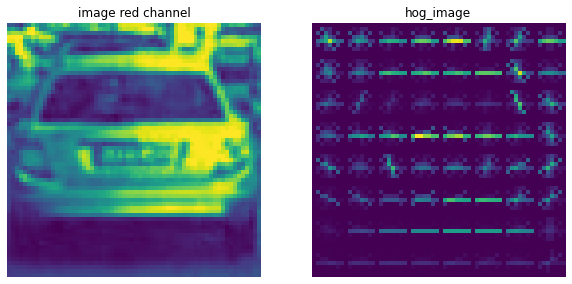

In [23]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(10,10))

axes[0].imshow(image[:,:,0])
axes[0].set_title("image red channel")
axes[0].axis("off")

axes[1].imshow(hog_image)
axes[1].set_title("hog_image")
axes[1].axis("off")

In [41]:
rhist = np.histogram(image[:, :, 0], bins=hist_bins, range=(0,256))
ghist = np.histogram(image[:, :, 1], bins=hist_bins, range=(0,256))
bhist = np.histogram(image[:, :, 2], bins=hist_bins, range=(0,256))

In [42]:
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

Text(0.5, 1.0, 'Blue Channel histogram')

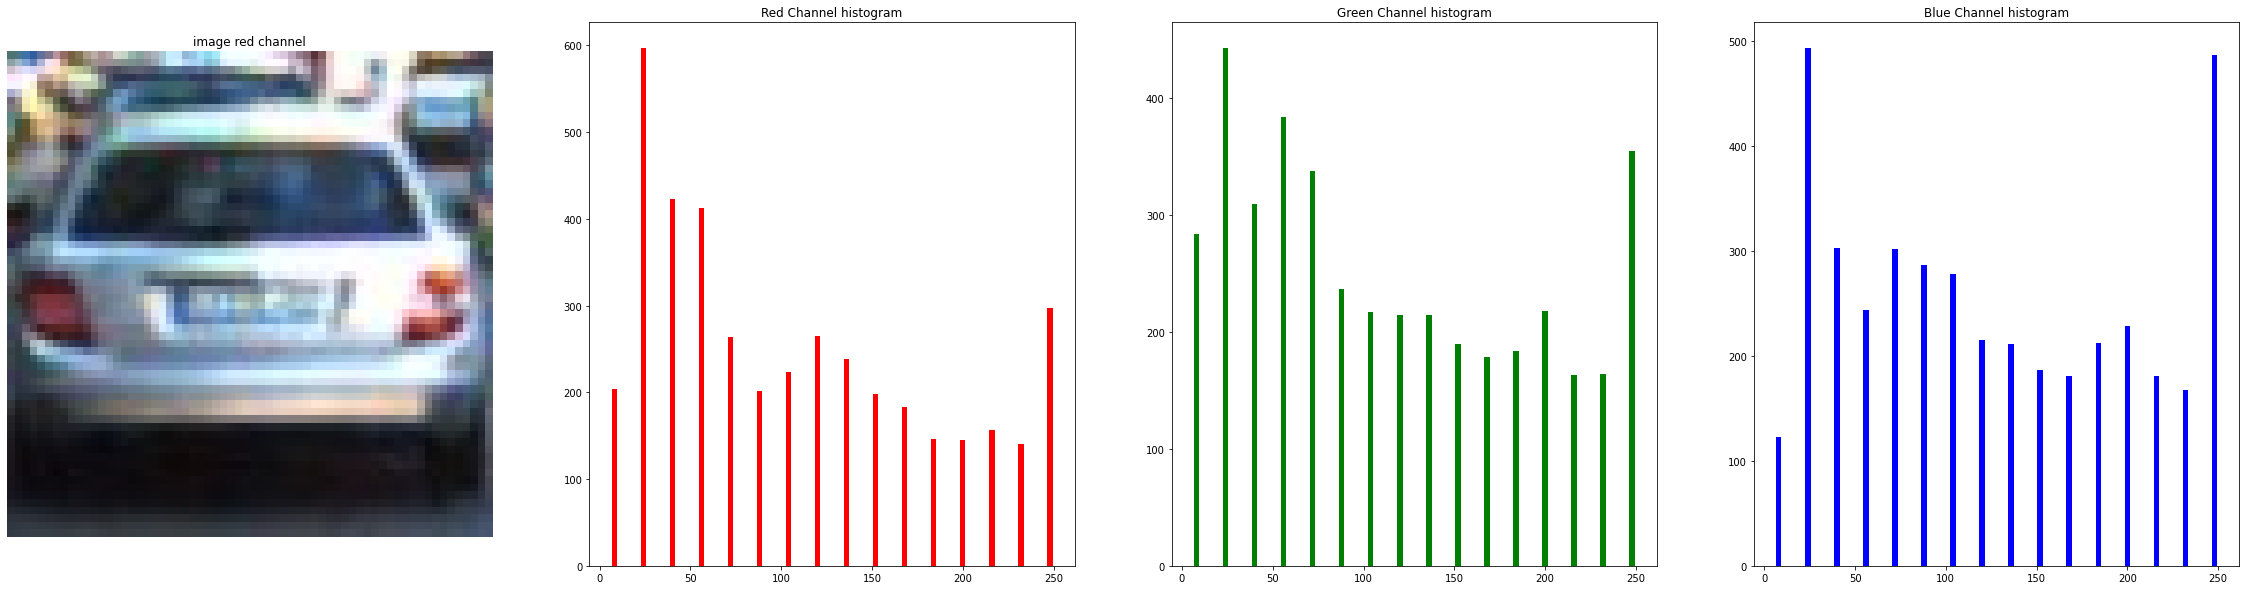

In [43]:
fig, axes = plt.subplots(nrows= 2, ncols=, figsize = (40,10))

axes[0, 0].imshow(image)
axes[0, 0].set_title("image red channel")
axes[0, 0].axis("off")

axes[0, 1].bar(bin_centers, rhist[0], width = 3, color="r")
axes[0, 1].set_title("Red Channel histogram")

axes[1, 0].bar(bin_centers, ghist[0], width = 3, color="g")
axes[1, 0].set_title("Green Channel histogram")

axes[1, 1].bar(bin_centers, bhist[0], width = 3, color="b")
axes[1, 1].set_title("Blue Channel histogram")

In [19]:
image = plt.imread("../Project_data/test_images/test6.jpg")

In [20]:
imcopy = image.copy()
for size_and_ystart in sizes_and_ystarts:

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[size_and_ystart[1][0], size_and_ystart[1][1]],
                        xy_window=(size_and_ystart[0], size_and_ystart[0]), xy_overlap=(0.5, 0.5))

    imcopy = draw_boxes(imcopy, windows, (0,0,255), 5)


(-0.5, 1279.5, 719.5, -0.5)

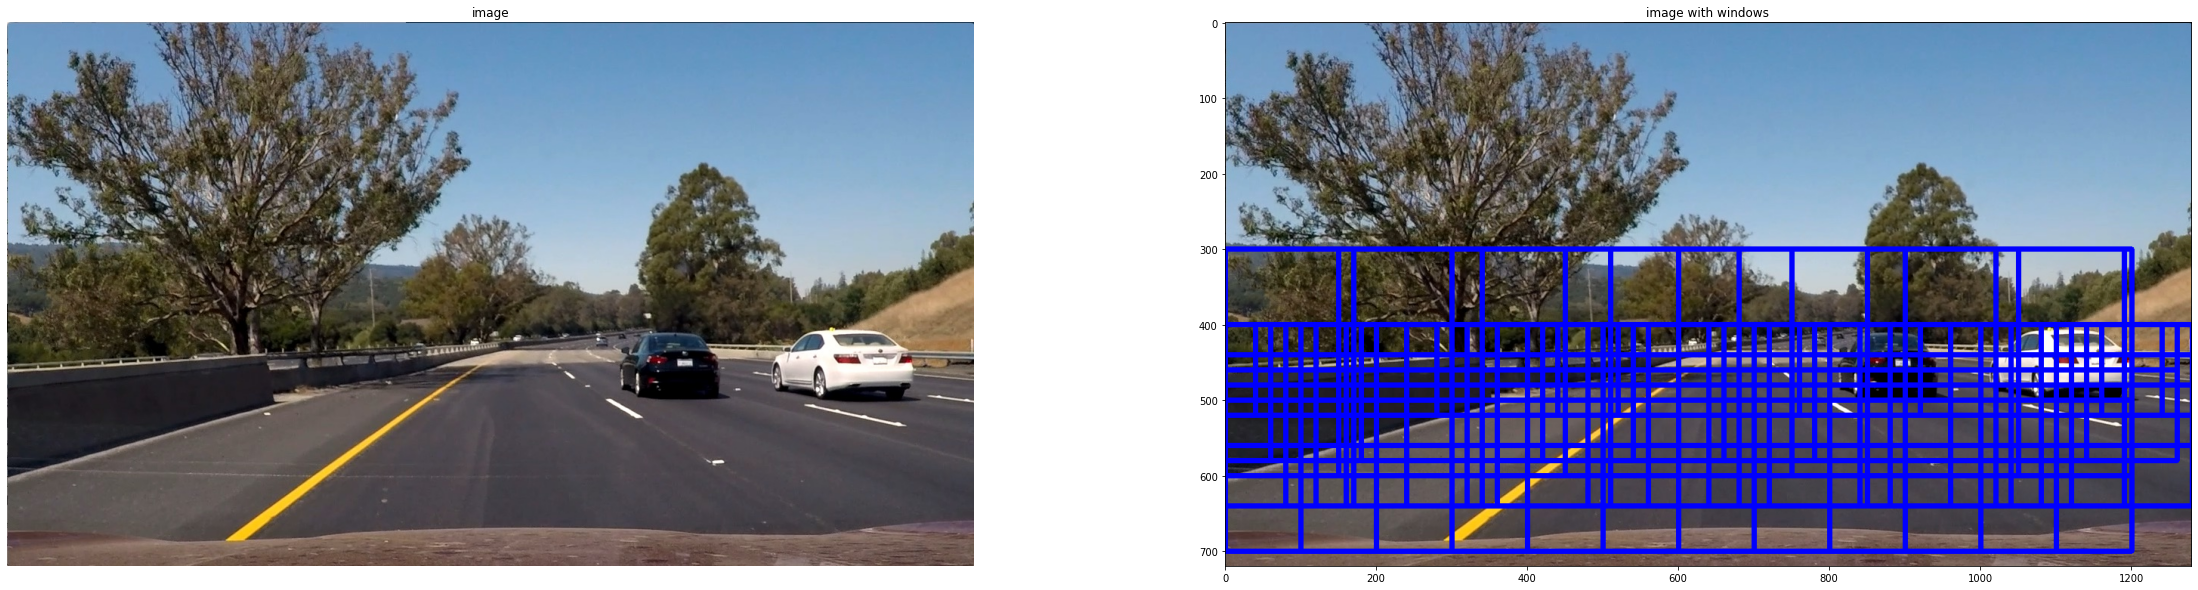

In [21]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize = (40,10))

axes[0].imshow(image)
axes[0].set_title("image")
axes[0].axis("off")

axes[1].imshow(imcopy)
axes[1].set_title("image with windows")
axes[0].axis("off")


In [22]:
hot_windows = []
for size_and_ystart in sizes_and_ystarts:

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[size_and_ystart[1][0], size_and_ystart[1][1]],
                        xy_window=(size_and_ystart[0], size_and_ystart[0]), xy_overlap=(0.5, 0.5))

    result = search_windows(image, windows, svc, X_scaler, hist_bins=hist_bins,
                            orient=orient, pix_per_cell=pix_per_cell,
                            cell_per_block=cell_per_block)

    for res in result:
        hot_windows.append(res)



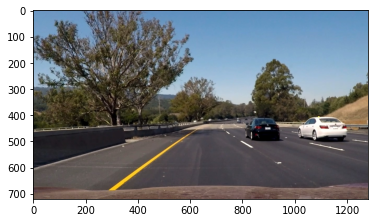

In [23]:
plt.imshow(image)

In [24]:
labels = heatmap_thresh(image, hot_windows, 0)
final_img = draw_labeled_bboxes(image, labels)

In [25]:
img_hot = draw_boxes(image, hot_windows, (0,0,255), 5)

In [26]:
# empty image
heatmap = np.zeros_like(image[:, :, 0])
for box in hot_windows:
    # 1's in the objects places
    heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # thresholding to remove false positives
heatmap[heatmap <= 1] = 0
# tuple of 2 elements that contains the positions of objects and the number of objects
labels = label(heatmap)

(-0.5, 1279.5, 719.5, -0.5)

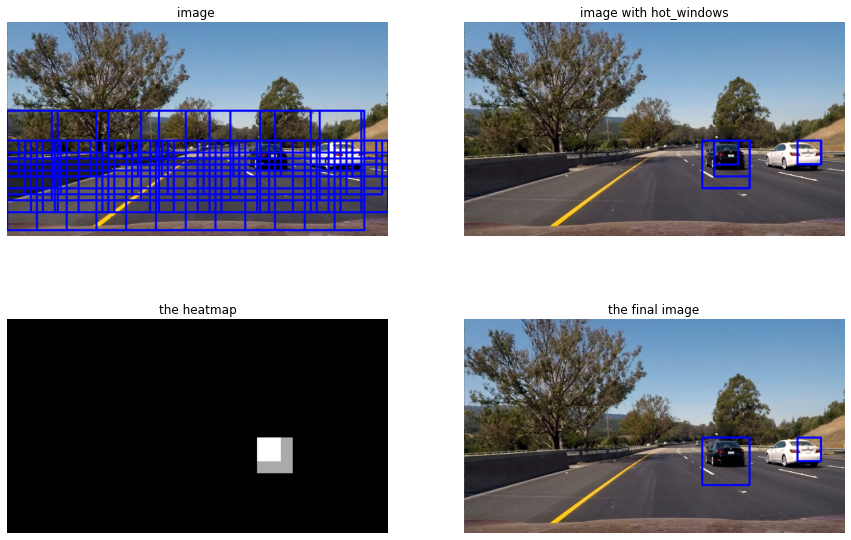

In [39]:
fig, axes = plt.subplots(nrows= 2, ncols=2, figsize = (15,10))

axes[0, 0].imshow(imcopy)
axes[0, 0].set_title("image ")
axes[0, 0].axis("off")

axes[0, 1].imshow(img_hot)
axes[0, 1].set_title("image with hot_windows")
axes[0, 1].axis("off")

axes[1, 0].imshow(heatmap, cmap = "gray")
axes[1, 0].set_title("the heatmap")
axes[1, 0].axis("off")

axes[1, 1].imshow(final_img)
axes[1, 1].set_title("the final image")
axes[1, 1].axis("off")


In [35]:
for car_number in range(1, labels[1] + 1):
    print(car_number)

1
2


In [126]:
labels[1]

1

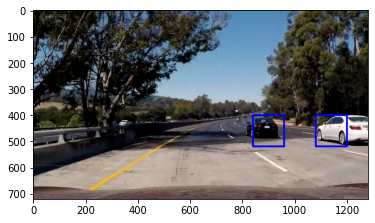

In [58]:
plt.imshow(final_img)

In [39]:
print((labels[0] == 1).nonzero())
print((labels[0] == 2).nonzero())


(array([400, 400, 400, ..., 519, 519, 519]), array([840, 841, 842, ..., 957, 958, 959]))
(array([400, 400, 400, ..., 519, 519, 519]), array([1080, 1081, 1082, ..., 1197, 1198, 1199]))
